Epoch 1/20
288/288 [==============================] - 3s 7ms/step - loss: 0.2733 - accuracy: 0.8753 - val_loss: 0.2237 - val_accuracy: 0.8943
Epoch 2/20
288/288 [==============================] - 2s 7ms/step - loss: 0.1832 - accuracy: 0.9311 - val_loss: 0.1624 - val_accuracy: 0.9409
Epoch 3/20
288/288 [==============================] - 2s 6ms/step - loss: 0.1520 - accuracy: 0.9474 - val_loss: 0.1446 - val_accuracy: 0.9478
Epoch 4/20
288/288 [==============================] - 2s 6ms/step - loss: 0.1366 - accuracy: 0.9514 - val_loss: 0.1315 - val_accuracy: 0.9561
Epoch 5/20
288/288 [==============================] - 2s 6ms/step - loss: 0.1253 - accuracy: 0.9593 - val_loss: 0.1310 - val_accuracy: 0.9496
Epoch 6/20
288/288 [==============================] - 2s 6ms/step - loss: 0.1181 - accuracy: 0.9607 - val_loss: 0.1263 - val_accuracy: 0.9500
Epoch 7/20
288/288 [==============================] - 2s 6ms/step - loss: 0.1137 - accuracy: 0.9640 - val_loss: 0.1194 - val_accuracy: 0.9630
Epoch 

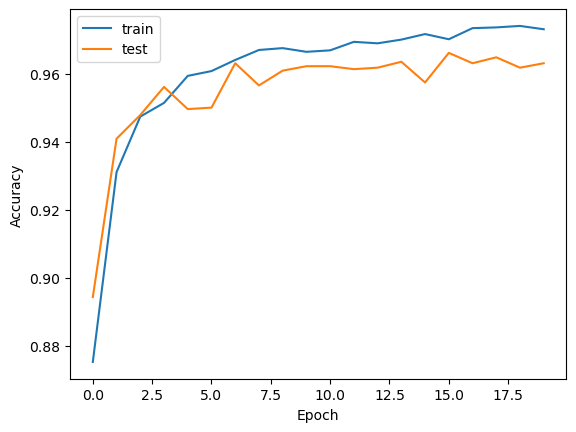

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 2)                 10818     
                                                                 
Total params: 11138 (43.51 KB)
Trainable params: 11138 (43.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


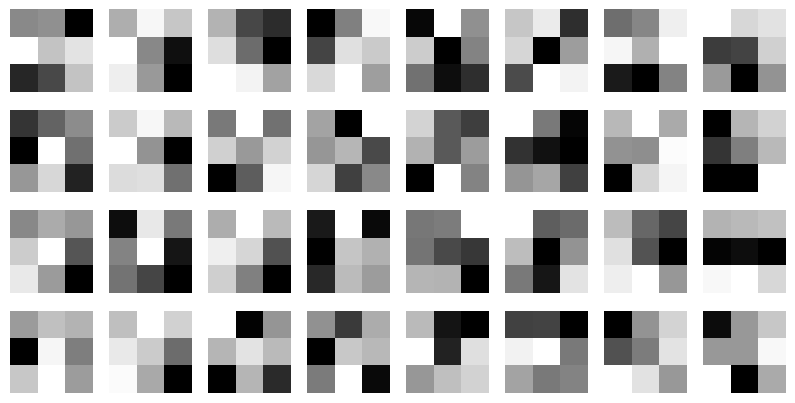

1/1 [==============================] - 0s 49ms/step


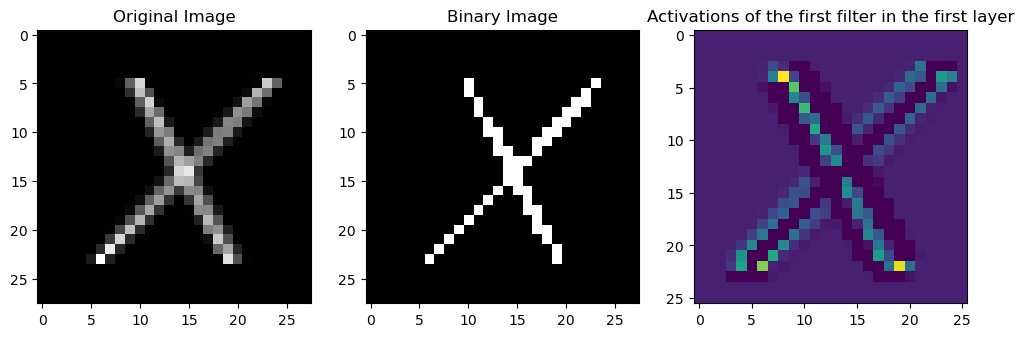

Weights for layer: [[[[-2.98088342e-02 -9.70444232e-02 -3.77577096e-02 -9.18788910e-01
    -2.05946550e-01  8.92494172e-02 -7.89855570e-02  3.22599292e-01
    -1.75045893e-01  7.98770227e-03 -1.63438290e-01  7.15770572e-02
     1.67229518e-01  1.94595516e-01 -1.72753492e-03 -2.92346865e-01
    -1.99538052e-01 -1.92557558e-01 -1.61125749e-01 -1.79393455e-01
    -3.27750482e-02  2.47822627e-01  8.74342630e-04  5.26073873e-02
    -2.39129383e-02 -1.40211016e-01  8.55454355e-02  4.25918587e-02
     8.61039162e-02 -1.57158911e-01 -6.47934675e-01 -6.38257504e-01]]

  [[-1.30637698e-02  2.14321986e-01 -5.15964746e-01 -3.42829436e-01
     3.54363233e-01  1.52527004e-01 -2.54773721e-02  1.40170455e-01
    -4.61320058e-02  1.94237381e-01  2.40449697e-01 -2.76126921e-01
    -3.76685970e-02  2.24917661e-02  1.08596005e-01  1.71215549e-01
    -7.24402517e-02  2.59669781e-01  2.79436976e-01  3.26161921e-01
    -1.96215976e-02 -8.53299573e-02 -3.55196893e-01  6.08778372e-02
     3.06880195e-02  2.688

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the dataset
data = pd.read_csv(r'C:\Users\Windows\Downloads\archive\2_character_TMNIST.csv')  # Update the path to your dataset file

# Separate data into features (X) and labels (y)
X = data.drop(columns=['names', 'labels'])
y = data['labels']

# Convert 'X' and 'O' labels to binary values (1 for 'X' and 0 for 'O')
y_binary = (y == 'X').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert grayscale to binary
X_train_binary = (X_train > 0.25).astype(float)
X_test_binary = (X_test > 0.25).astype(float)

# Create a CNN model with separate filters for 'X' and 'O'
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))  # Two output neurons with softmax activation

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert labels to one-hot encoding for multi-class classification
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Train the model for more epochs
history = model.fit(X_train, y_train_onehot, epochs=20, validation_data=(X_test, y_test_onehot))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test_onehot)
print(f'Test accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Summary (Architecture)
model.summary()

# Visualize filters
filters, biases = model.layers[0].get_weights()
plt.figure(figsize=(10, 5))
for i in range(filters.shape[3]):
    plt.subplot(4, 8, i+1)
    plt.imshow(filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

# Visualize activations
from tensorflow.keras.models import Model

# Create a model to output the activations of the first layer
activation_model = Model(inputs=model.input, outputs=model.layers[0].output)

# Get activations for a sample input
sample_activation = activation_model.predict(X_train[0].reshape(1, 28, 28, 1))

# Visualize original, normalized, and binary images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(X_train_binary[0].reshape(28, 28), cmap='gray')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(sample_activation[0, :, :, 0], cmap='viridis')
plt.title('Activations of the first filter in the first layer')

plt.show()

# Print final weights
for layer in model.layers:
    if layer.get_weights():
        weights, biases = layer.get_weights()
        print(f"Weights for layer: {weights}")
        print(f"Biases for layer: {biases}")


# Same thing but back to binary crossentropy and sigmoid activation

Epoch 1/20
288/288 [==============================] - 1s 3ms/step - loss: 0.3071 - accuracy: 0.8492 - val_loss: 0.2721 - val_accuracy: 0.8622
Epoch 2/20
288/288 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.8759 - val_loss: 0.2562 - val_accuracy: 0.8761
Epoch 3/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2392 - accuracy: 0.8872 - val_loss: 0.2390 - val_accuracy: 0.8857
Epoch 4/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2233 - accuracy: 0.8991 - val_loss: 0.2279 - val_accuracy: 0.8909
Epoch 5/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2113 - accuracy: 0.9066 - val_loss: 0.2242 - val_accuracy: 0.8987
Epoch 6/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2050 - accuracy: 0.9104 - val_loss: 0.2171 - val_accuracy: 0.9022
Epoch 7/20
288/288 [==============================] - 1s 2ms/step - loss: 0.1955 - accuracy: 0.9170 - val_loss: 0.2138 - val_accuracy: 0.9026
Epoch 

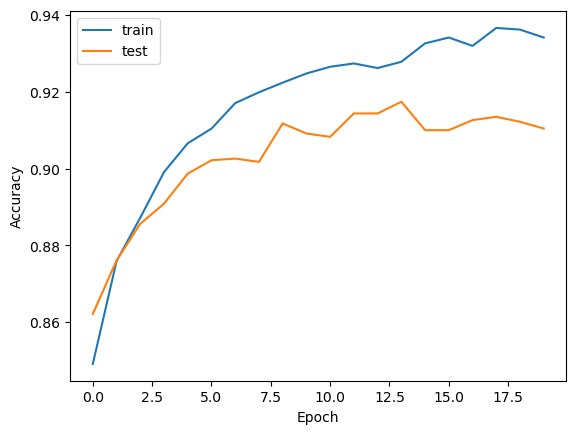

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 5408)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 5409      
                                                                 
Total params: 5729 (22.38 KB)
Trainable params: 5729 (22.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


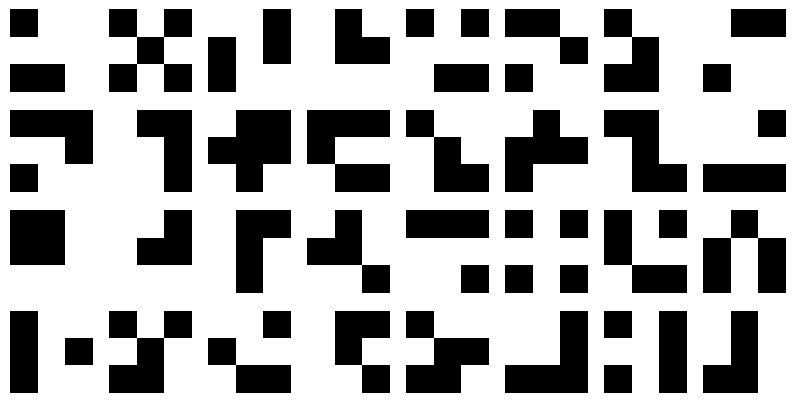

1/1 [==============================] - 0s 34ms/step


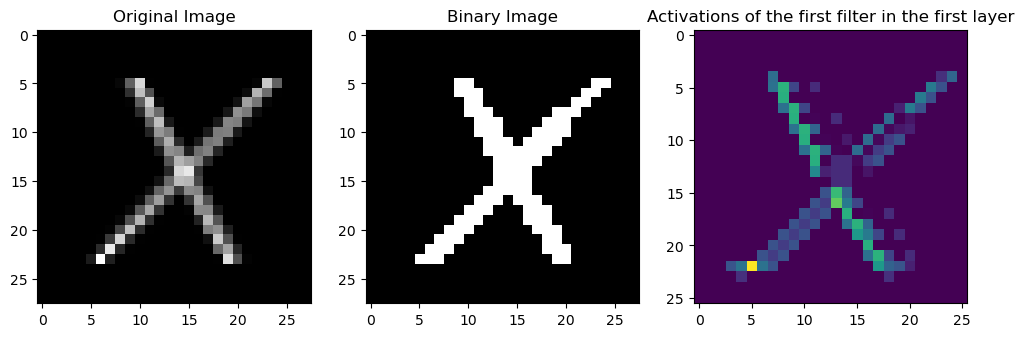

Binary Weights for layer: [[[[0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0.
    0. 1. 0. 0. 1. 1. 0. 1. 0. 1.]]

  [[1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
    1. 0. 1. 1. 1. 0. 1. 1. 1. 0.]]

  [[1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0.
    0. 1. 1. 0. 0. 0. 1. 0. 0. 1.]]]


 [[[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1.
    0. 0. 0. 1. 0. 1. 1. 1. 1. 1.]]

  [[1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.
    1. 1. 1. 0. 1. 0. 0. 1. 1. 0.]]

  [[1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
    1. 0. 0. 1. 1. 1. 0. 0. 0. 1.]]]


 [[[0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
    1. 0. 0. 0. 1. 1. 0. 0. 0. 0.]]

  [[0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
    0. 1. 1. 0. 0. 1. 0. 0. 1. 0.]]

  [[1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
    0. 0. 1. 1. 0. 0. 1. 0. 0. 1.]]]]
Biases

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the dataset
data = pd.read_csv(r'C:\Users\Windows\Downloads\archive\2_character_TMNIST.csv')  # Update the path to your dataset file

# Separate data into features (X) and labels (y)
X = data.drop(columns=['names', 'labels'])
y = data['labels']

# Convert 'X' and 'O' labels to binary values (1 for 'X' and 0 for 'O')
y_binary = (y == 'X').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert grayscale to binary
X_train_binary = (X_train > 0.05).astype(float)
X_test_binary = (X_test > 0.05).astype(float)

# Create a CNN model with binary filters
binary_model = Sequential()
binary_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
binary_model.add(MaxPooling2D((2, 2)))
binary_model.add(Flatten())
binary_model.add(Dense(1, activation='sigmoid'))

# Compile the model
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for more epochs
history = binary_model.fit(X_train_binary, y_train, epochs=20, validation_data=(X_test_binary, y_test))

# Evaluate the model
test_loss, test_accuracy = binary_model.evaluate(X_test_binary, y_test)
print(f'Test accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Summary (Architecture)
binary_model.summary()

# Visualize binary filters
binary_filters, biases = binary_model.layers[0].get_weights()
plt.figure(figsize=(10, 5))
for i in range(binary_filters.shape[3]):
    binary_filters[:, :, 0, i] = 2 * (binary_filters[:, :, 0, i] > 0) - 1  # Convert 0 to -1 and 1 to 1
    plt.subplot(4, 8, i + 1)
    plt.imshow(binary_filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

# Visualize activations
from tensorflow.keras.models import Model

# Create a model to output the activations of the first layer
activation_model = Model(inputs=binary_model.input, outputs=binary_model.layers[0].output)

# Get activations for a sample input
sample_activation = activation_model.predict(X_train_binary[0].reshape(1, 28, 28, 1))

# Visualize original, normalized, and binary images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(X_train_binary[0].reshape(28, 28), cmap='gray')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(sample_activation[0, :, :, 0], cmap='viridis')
plt.title('Activations of the first filter in the first layer')

plt.show()

# Print final binary weights
for layer in binary_model.layers:
    if layer.get_weights():
        binary_weights, biases = layer.get_weights()
        binary_weights = 2 * (binary_weights > 0) - 1  # Convert 0 to -1 and 1 to 1
        print(f"Binary Weights for layer: {binary_weights}")
        print(f"Biases for layer: {biases}")


# Straight Through Estimator

Epoch 1/20
288/288 [==============================] - 1s 3ms/step - loss: 0.3050 - accuracy: 0.8520 - val_loss: 0.2805 - val_accuracy: 0.8661
Epoch 2/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.8733 - val_loss: 0.2621 - val_accuracy: 0.8761
Epoch 3/20
288/288 [==============================] - 1s 3ms/step - loss: 0.2468 - accuracy: 0.8861 - val_loss: 0.2431 - val_accuracy: 0.8826
Epoch 4/20
288/288 [==============================] - 1s 3ms/step - loss: 0.2296 - accuracy: 0.8948 - val_loss: 0.2442 - val_accuracy: 0.8896
Epoch 5/20
288/288 [==============================] - 1s 3ms/step - loss: 0.2165 - accuracy: 0.9043 - val_loss: 0.2258 - val_accuracy: 0.8978
Epoch 6/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2099 - accuracy: 0.9089 - val_loss: 0.2306 - val_accuracy: 0.8943
Epoch 7/20
288/288 [==============================] - 1s 2ms/step - loss: 0.2003 - accuracy: 0.9145 - val_loss: 0.2182 - val_accuracy: 0.9070
Epoch 

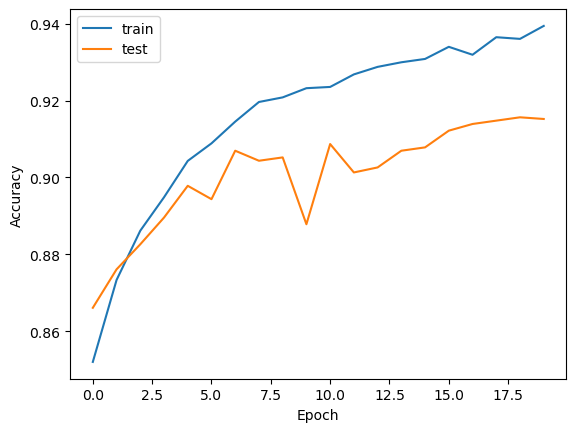

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 5409      
                                                                 
Total params: 5729 (22.38 KB)
Trainable params: 5729 (22.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


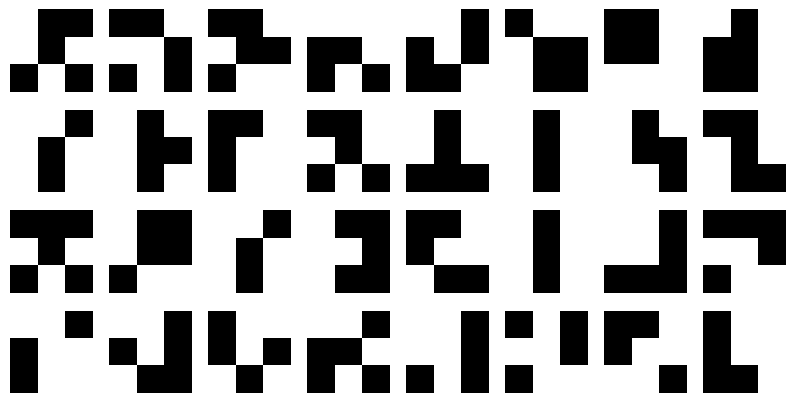

1/1 [==============================] - 0s 57ms/step


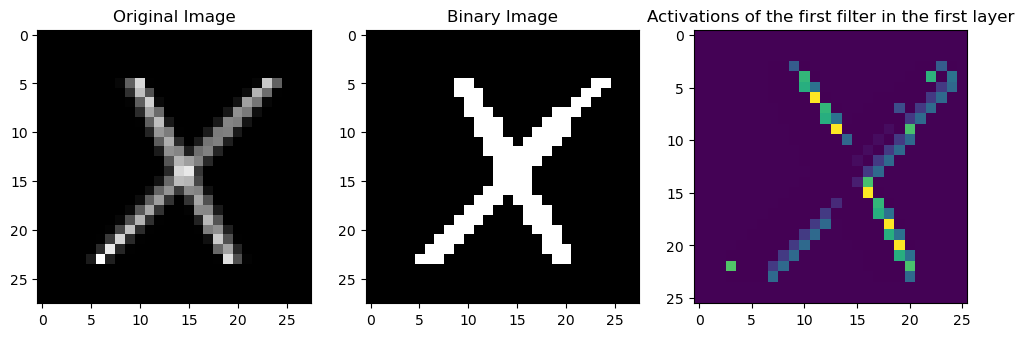

Binary Weights for layer: [[[[1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
    1. 0. 1. 1. 0. 1. 1. 0. 0. 0.]]

  [[0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
    1. 0. 1. 1. 1. 1. 1. 1. 0. 1.]]

  [[0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
    0. 0. 0. 0. 1. 0. 0. 0. 1. 1.]]]


 [[[1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
    1. 1. 0. 0. 0. 0. 1. 1. 0. 0.]]

  [[0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
    1. 1. 1. 1. 1. 0. 1. 1. 1. 1.]]

  [[1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
    0. 0. 1. 0. 0. 1. 0. 0. 1. 1.]]]


 [[[0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
    0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]]

  [[1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
    0. 1. 1. 0. 0. 1. 1. 1. 1. 0.]]

  [[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
    0. 1. 1. 0. 1. 0. 0. 1. 0. 1.]]]]
Biases

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the dataset
data = pd.read_csv(r'C:\Users\Windows\Downloads\archive\2_character_TMNIST.csv')  # Update the path to your dataset file

# Separate data into features (X) and labels (y)
X = data.drop(columns=['names', 'labels'])
y = data['labels']

# Convert 'X' and 'O' labels to binary values (1 for 'X' and 0 for 'O')
y_binary = (y == 'X').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert grayscale to binary
X_train_binary = (X_train > 0.05).astype(float)
X_test_binary = (X_test > 0.05).astype(float)

# Create a CNN model with binary filters
binary_model = Sequential()
binary_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
binary_model.add(MaxPooling2D((2, 2)))
binary_model.add(Flatten())
binary_model.add(Dense(1, activation='sigmoid'))

# Compile the model
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for more epochs
history = binary_model.fit(X_train_binary, y_train, epochs=20, validation_data=(X_test_binary, y_test))

# Evaluate the model
test_loss, test_accuracy = binary_model.evaluate(X_test_binary, y_test)
print(f'Test accuracy: {test_accuracy}')

# Plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model Summary (Architecture)
binary_model.summary()

# Visualize binary filters
binary_filters, biases = binary_model.layers[0].get_weights()
plt.figure(figsize=(10, 5))
for i in range(binary_filters.shape[3]):
    binary_filters[:, :, 0, i] = (binary_filters[:, :, 0, i] > 0).astype(float)
    plt.subplot(4, 8, i + 1)
    plt.imshow(binary_filters[:, :, 0, i], cmap='gray')
    plt.axis('off')
plt.show()

# Visualize activations
from tensorflow.keras.models import Model

# Create a model to output the activations of the first layer
activation_model = Model(inputs=binary_model.input, outputs=binary_model.layers[0].output)

# Get activations for a sample input
sample_activation = activation_model.predict(X_train_binary[0].reshape(1, 28, 28, 1))

# Visualize original, normalized, and binary images
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(X_train_binary[0].reshape(28, 28), cmap='gray')
plt.title('Binary Image')

plt.subplot(133)
plt.imshow(sample_activation[0, :, :, 0], cmap='viridis')
plt.title('Activations of the first filter in the first layer')

plt.show()

# Print final binary weights
for layer in binary_model.layers:
    if layer.get_weights():
        binary_weights, biases = layer.get_weights()
        binary_weights = (binary_weights > 0).astype(float)
        print(f"Binary Weights for layer: {binary_weights}")
        print(f"Biases for layer: {biases}")